# 机器学习


## 定义
随着经验$E$的增长，程序对于任务$T$在度量标准$P$表现良好的准确，我们称之为程序对任务$T$进行了学习。<br>
> <font color='red'>这也是机器学习目前的困境所在，只能针对单方面的事物进行学习，还不会变通</font>

## 类别
- 回归与分类


1. 分类问题：对数据进行类别划分
2. 回归问题：对数据进行预测评估
> <font color='red'>两者的区别在于结果空间的划分，分类结果严格独立，属于不同的空间，但是回归问题具有同一的空间量度 <br> 
不过，通过对回归空间的严格区间划分，也可以进行分类问题的求解
</font>

- 监督和非监督


1. 监督学习：依据既定标准量度进行学习
2. 非监督学习：程序自行判断，自行学习并对新数据进行学习成果的展开，不存在人为指定既定标准
> <font color='red'>监督学习是对人既定的知识、判断的扩充，非监督学习，完全是程序自我学习的结果。</font>

# 梯度下降


沿着梯度反方向进行移动，最终到达最低点。<br>
> <font color='red'>针对凸函数</font>

对于$f(x)$，梯度下降可以这样进行表示
$$
\Large x_{next} = x - \eta f'(x)
$$

其中$\Large \eta$表示学习率，正是梯度的有效移动率。
> <font color='red'>虽然直接求导就是极值，但是对于导数不存在、不可导等一系列问题，梯度下降不存在此类问题，方便普适</font>

# 归一化
机器对于数据大小敏感，但是对于含义不敏感。<br>
$100 > 1$,即时$100nm < 1km$，所以，为了减少误差，一般都需要进行数据归一化处理。

## 放缩
$$
\Large \hat x = \frac{x - x_{min}}{x_{max} - x_{min}}
$$
这种办法，会按照自身的尺度对数据进行放缩，变换为$\hat x \in [0, 1]$的数据。

## 偏移
$$
\Large \hat x = \frac{x - \mu}{\sigma}
$$

- $\Large \mu$: 样本均值
- $\Large \sigma$: 样本标准差
$$
\Large 
\left\{
\begin{matrix}
\mu =& \frac{\sum_i^n x_i}{n} \\
\sigma =& \sqrt{\frac{\sum_i^n (x_i - \mu)^2}{n}}
\end{matrix}
\right.
$$

虽然没有放缩直观，但是得到的数据样本保持同原样本数据的同分布，对后续计算有极大便利，而且从内在保留数据规律。

# 高斯函数

$$
\Large f(x) = \frac{1}{\sqrt{2\pi} \sigma}\exp\left(- \frac{(x - \mu)^2}{2 \sigma}\right)
$$

# 线性回归推导


$$
{\Large f(X)} = \theta_0 + \theta_1x_1 + \dots + \theta_nx_n
$$
矩阵表示
$$
\begin{aligned}
{\Large \theta} =& \left[
\begin{matrix}
\theta_n & \theta_{n-1} & \dots & \theta_1 & \theta_0
\end{matrix}
\right] \\
{\Large X} =& \left[
\begin{matrix}
x_n & x_{n-1} & \dots & x_1 & 1
\end{matrix}
\right] \\
 f(X) =&  \theta X^T
\end{aligned}
$$

对于一个已知的函数式而言,$f(x) = \theta X^T$式没有问题的<br>
但是对于一个统计问题，也就是对于$X$全部已知，对$\theta$一无所知的情况，我们实际求解的应该是$f(\theta)$

## 误差引入
对于生活中总是存在误差，所以函数这样来表示比较正确
$$
\Large Y = f(X) + \epsilon \Rightarrow \epsilon = Y -f(X)
$$

一般来说，误差是服从正太分布的
$$
\epsilon  = \frac{1}{\sqrt{2\pi} \sigma}\exp\left(- \frac{(y_i - f(x_i))^2}{2 \sigma}\right)
$$

# 极大似然
最经常发生的，概率就是最大的。 <br>
举个例子，抛硬币，十次里面有六次朝上，那么反面的概率是多少。<br>
假设朝上的概率为$p$，朝下的概率为$q$

$$
\begin{aligned}
p =& 1 - q \\
P(6,4) =& p^6q^4 = p^6(1-p)^4 \\
\triangledown P(6,4) =& 6p^5(1-p)^4 - 4p^6(1-p)^3 \\
=& p^5(1-p)^3(6 - 10p) \\
\Rightarrow &\left\{
\begin{matrix}
p_1 =& 0 \\
p_2 =& 1\\
p_3 =& \frac{6}{10} = \frac{3}{5}\\
\end{matrix}
\right.
\end{aligned}
$$
这样就求解出概率了。

$$
P(y_i|x_i;\theta) = \frac{1}{\sqrt{2\pi} \sigma}\exp\left(- \frac{(y_i - f(x_i))^2}{2 \sigma^2}\right)
$$

$$
\begin{aligned}
L(\theta) =& \prod P(y|x;\theta) \\
=&\prod_i^m \frac{1}{\sqrt{2\pi} \sigma}\exp\left(- \frac{(y_i - f(x_i))^2}{2 \sigma}\right) \\
\end{aligned}
$$
取对数
$$
\begin{aligned}
\log(L(\theta)) =& \prod_i^m \log(\frac{1}{\sqrt{2\pi} \sigma}\exp\left(- \frac{(y_i - f(x_i))^2}{2 \sigma}\right) \\
=& m\log\frac{1}{\sqrt{2\pi} \sigma} - \frac{1}{\sigma ^2}\frac{1}{2}\sum_i^n (y_i - f(x_i))^2
\end{aligned} 
$$

所以最后实际上是求取$J(\theta)$的极小值
$$
J(\theta) = \frac{1}{2}\sum_i^n(y_i - f(x_i))^2 = \frac{1}{2}(\theta X^T - Y)^2 = \frac{1}{2}(\theta X - Y)^T(\theta X - Y)
$$

导数为
$$
\begin{aligned}
\triangledown J(\theta) =& \triangledown_\theta\left(\frac{1}{2}(\theta X - Y)^T(\theta X - Y)\right) \\
=& \triangledown_\theta\left(\frac{1}{2} (\theta^TX^T - Y)(\theta X - Y)\right) \\
=& \triangledown_\theta\left(\frac{1}{2}(\theta^TX^TX\theta - \theta^TX^TY - Y^TX\theta + Y^TY)\right) \\
=& \frac{1}{2}\left( 2X^TX\theta - X^TY + (Y^TX)^T\right) \\
=& X^TX\theta - X^TY
\end{aligned}
$$

令导数为0
$$
\begin{aligned}
X^TX\theta - X^TY &=& 0 \\
\Rightarrow \theta &=& (X^TX)^{-1}X^TY
\end{aligned}
$$

# 逻辑回归


## sigma
$$
\Large g(z) = \frac{1}{e^{-z} + 1}
$$

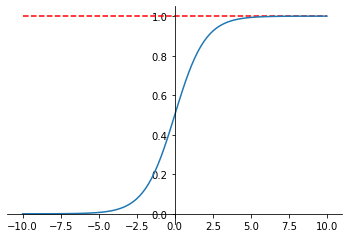

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigma(x):
    return 1 / (np.power(np.e, -x) + 1)

def center(ax):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

X = np.linspace(-10, 10, 100)
Y = sigma(X)
top = np.ones(X.shape)
axes = plt.subplot(111)
center(axes)
plt.plot(X, top, color='red', linestyle="--")
plt.plot(X, Y)
plt.show()

首先经过线性变换得到基础表达式$f(x)$，然后通过$g(z)$函数进行空间映射
$$
\begin{aligned}
f(x) =& \theta X^T \\
g(\theta, x) =& g(f(x)) =\frac{1}{e^{-f(x)} + 1}
\end{aligned}
$$

二分类而言
$$
\begin{aligned}
\left\{
\begin{matrix}
true & g(x) \ge 0.5 \\
false & g(x) < 0.5
\end{matrix}
\right.
\end{aligned}
$$

为了统一两次的定义，我们这样来表示概率
$$
\Large P(y|x;\theta) = g(\theta, x)^{y} (1-g(\theta ,x))^{1-y}
$$

# 极大似然
$$
L(\theta) = \prod_i^n g(\theta, x_i)^{y_i} (1-g(\theta ,x_i))^{1-y_i}
$$

# 取对数
$$
\log(L(\theta)) = \sum_i^n\left(y_i\log g(\theta,x_i) + (1 - y_i)\log (1 - g(\theta, x_i)))\right)
$$
最后求解得到和线性回归最小而乘法相同。

# 损失函数
我们所说的梯度下降，就是使用在损失函数上面的，损失最小的，也就最大可能了。<br>
也就是我们通过最大似然函数得到的等值中的负项。<br>
理论上通过梯度下降可以使下降最快，最好，但是工业上面可以遍历，手工试一下。

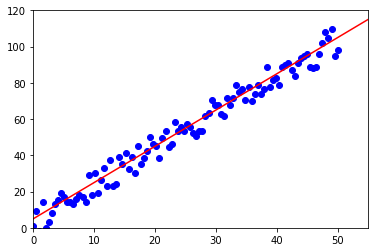

In [22]:
def offset(_Y):
    return _Y + np.random.randint(-9, 8 ,size=_Y.shape)

def calc(_X, _W):
    return _W[0] * _X + _W[1]

X = np.linspace(0, 50, 100)
W = np.array([2, 5])

    
base_Y = calc(X, W)
off_Y = offset(base_Y)


def draw_scatter():
    plt.scatter(X, off_Y, color='blue')
    
def draw_line(_W, x_min=0, x_max=55, y_min=0, y_max=120):
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    _X = np.linspace(x_min, x_max, 100)
    _Y = calc(_X, _W)
    plt.plot(_X, _Y, color='red')
    
draw_line(W)
draw_scatter()

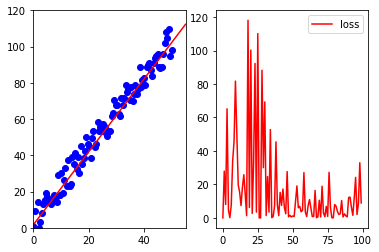

In [23]:
from IPython import display
import math

def grad(_X, _W, _Y):
    return (calc(_X, _W) - _Y) * _W[0]

def cost(_X, _W, _Y):
    return 0.5 * (calc(_X, _W) - _Y) ** 2

def update_W(_W, _cost, rate=np.array([0.003, 0.002])):
    _W -= rate * _cost
    return _W

guess_W = np.array([1.0, 1.0])
loss = []
for x, y in zip(X, off_Y):
    _cost = grad(x, guess_W, y)
    guess_W = update_W(guess_W, _cost)
    loss.append(cost(x, guess_W, y))
    plt.subplot(121)
    draw_line(guess_W)
    draw_scatter()
    plt.subplot(122)
    plt.plot(np.arange(len(loss)), loss, color='red', label='loss')
    plt.legend()
    plt.show()
    display.clear_output(wait=True)

In [4]:
guess_W

array([2.08900161, 1.72600107])

# 批量梯度


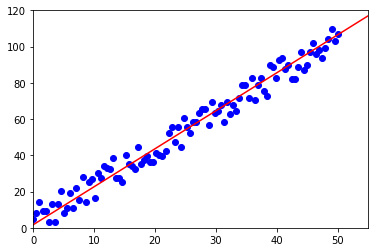

In [5]:
times = 100
batch = 10
length = len(X)
guess_W = np.array([1.0, 1.0])
for _ in range(times):
    batch_index = np.random.choice(length, batch)
    _cost = 0
    for index in batch_index:
        _cost += grad(X[index], guess_W, off_Y[index])
    guess_W = update_W(guess_W, _cost / batch)
    draw_scatter()
    draw_line(guess_W)
    plt.show()
    display.clear_output(wait=True)

In [25]:
def cost(_X, _W, _Y):
    return 0.5 * (np.dot(_W, _X) - _Y) ** 2

def grad(_X, _W, _Y):
    return (np.dot(_W, _X) - _Y) * _W[0]

def update_W(_W, _G, learn_rate=np.array([0.001,0.002])):
    return _W - (_G * learn_rate)

In [26]:
new_X = np.array([X, np.ones(X.shape)])

In [27]:
guess_W = np.array([1.0,1.0])

In [29]:
def train(batch_size, _X, _Y, times):
    _,length = _X.shape
    guess_W = np.array([1.0, 1.0])
    loss = []
    for cursor in range(times):
        index = np.random.choice(length, batch_size)
        x_data = _X[:,index]
        y_data = _Y[index]
        _G = grad(x_data, guess_W, y_data).mean()
        loss.append(cost(_X, guess_W, _Y).mean())
        guess_W = update_W(guess_W, _G)
        plt.subplot(121)
        draw_scatter()
        draw_line(guess_W)
        plt.subplot(122)
        plt.plot(np.arange(len(loss)), loss, color='red', label='loss')
        plt.legend()
        plt.show()
        display.clear_output(wait=True)

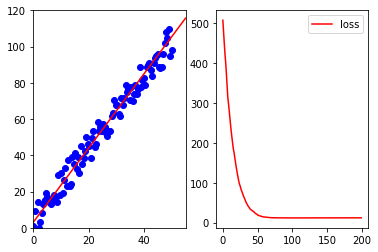

In [30]:
train(10, new_X, off_Y, 200)

# 逻辑回归

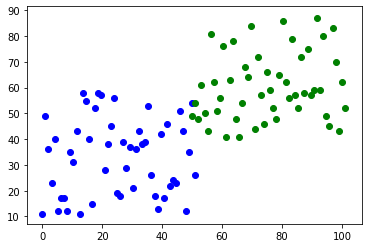

In [34]:
x_1 = np.linspace(0, 51, 50)
x_2 = np.linspace(50, 101, 50)
A = np.random.randint(10, 60, x_1.shape)
B = np.random.randint(40, 90, x_2.shape)
def show_point():
    plt.scatter(x_1, A, color='blue')
    plt.scatter(x_2, B, color='green')
    
show_point()

In [35]:
blue_X = np.array([x_1, A])
green_X = np.array([x_2, B])
X = np.c_[blue_X, green_X]
X = np.r_[X, np.ones((1, X.shape[1]))]

In [36]:
Y = np.ones(X.shape[1])
Y[0:50] = 0

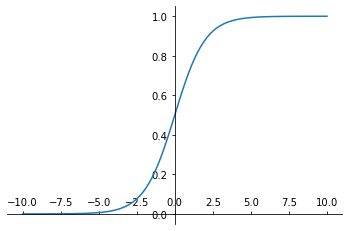

In [37]:
def f(_X, _W):
    return np.dot(_W, _X)

def g(_Z):
    return 1 / (1 + np.exp(- _Z))

def h(_X, _W):
    f_x = f(_X, _W)
    return g(f_x)

def G(_W, _X, _Y):
    h_x = h(_X, _W)
    return (h_x - _Y) * _X

def update_W(_W, _G, learn_rate=np.array([0.001, 0.002, 0.003])):
    return _W - (learn_rate * _G)


def cost(_W, _X, _Y):
    h_x = h(_X, _W)
    return _Y * np.log(h_x) + (1 - _Y) * np.log(1 - h_x)
    
_x = np.linspace(-10, 10, 100)
_y = g(_x)

def sigmod():
    fig, ax = plt.subplots()
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.spines['top'].set_position(('data',0))
    plt.plot(_x, _y)
sigmod()

In [38]:
def train(_X, _Y, batch, times):
    guess_W = np.array([1.0, 2.0, 3.0])
    _, length = _X.shape

    loss = []
    _g = []
    _back = []
    for iter_index in range(times):
        data_index = np.random.choice(length, batch)
        x_data = _X[:, data_index]
        y_data = _Y[data_index]
        _G = G(guess_W, _X, _Y).mean()
        _g.append(_G)
        guess_W = update_W(guess_W, _G)
        loss.append(cost(guess_W, _X, _Y).mean())
        display.clear_output(wait=True)
        plt.subplot(121)
        plt.plot(np.arange(len(loss)), loss, color='red', label='loss')
        plt.legend()
        plt.subplot(122)
        plt.plot(np.arange(len(_g)), _g, color='red', label='grad')
        plt.legend()
        _back.append(h(x_data, guess_W).mean())
        plt.show()
    return guess_W


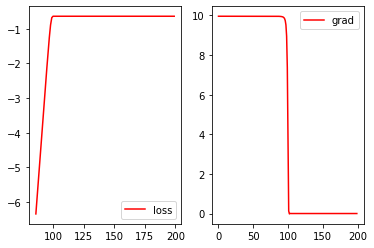

In [39]:
guess_W = train(X, Y, 5, 200)

In [45]:
def which_type(x, y, threshold=0.67):
    X = np.array([x, y, 1]).reshape((3, -1))
    f_x = f(X, guess_W)
    h_x = g(f_x)
    color = 'blue' if h_x < threshold else 'green' 
    plt.scatter(f_x, h_x, color=color)
    
        

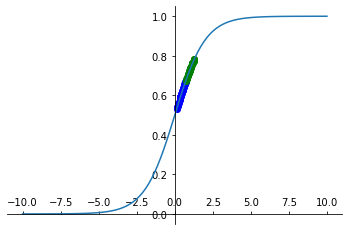

In [47]:

sigmod()
_, length = green_X.shape
for index in range(length):
    item = blue_X[:, index]
    temp = which_type(item[0], item[1])

for index in range(length):
    item = green_X[:, index]
    temp = which_type(item[0], item[1])
